<a href="https://colab.research.google.com/github/Matonice/Hamoye-intership/blob/main/Stage_E_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
 #reading the text file and also  making the datetime column the index
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/household_power_consumption.txt",sep=";", header=0, low_memory=False, infer_datetime_format=True, parse_dates={"datetime":[0,1]}, index_col=["datetime"])

In [ ]:
df.shape

(2075259, 7)

In [ ]:
# taking a look at our dataset
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# checking for null values
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
# replacing some datasets with nan
df.replace("?", "nan", inplace=True)

In [ ]:
# converting the object column to float
df = df.astype("float32")

In [ ]:
# checking for missing values
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
from fbprophet import Prophet
import scipy
import scipy.stats


In [ ]:
# filling the missing value with the average of each column
df = df.fillna(df.mean())

In [ ]:
df.head

<bound method NDFrame.head of                      Global_active_power  ...  Sub_metering_3
datetime                                  ...                
2006-12-16 17:24:00                4.216  ...            17.0
2006-12-16 17:25:00                5.360  ...            16.0
2006-12-16 17:26:00                5.374  ...            17.0
2006-12-16 17:27:00                5.388  ...            17.0
2006-12-16 17:28:00                3.666  ...            17.0
...                                  ...  ...             ...
2010-11-26 20:58:00                0.946  ...             0.0
2010-11-26 20:59:00                0.944  ...             0.0
2010-11-26 21:00:00                0.938  ...             0.0
2010-11-26 21:01:00                0.934  ...             0.0
2010-11-26 21:02:00                0.932  ...             0.0

[2075259 rows x 7 columns]>

In [ ]:
# checking for null values again
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
# resampling the dataset to a daily timeframe
df_daily = df.resample("D").sum()

**Question 11** 

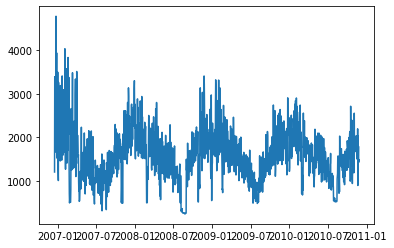

In [ ]:
plt.plot(df_daily.index, df_daily.Global_active_power)

**Question 12t**

In [ ]:
corr = np.corrcoef(df_daily.Global_reactive_power, df_daily.Global_active_power)
corr

array([[1.        , 0.04109788],
       [0.04109788, 1.        ]])

**Question 13**

In [ ]:
corr = np.corrcoef(df_daily.Voltage, df_daily.Global_intensity)
corr

array([[1.        , 0.05221351],
       [0.05221351, 1.        ]])

In [ ]:
df_daily.shape

(1442, 7)

In [ ]:
1442-365

1077

In [ ]:
# splitting the data into train and test split
train = df_daily.iloc[:1077, :]
test = df_daily.iloc[1077:, :]

In [ ]:
train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [ ]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [ ]:
df_train = train.iloc[:,:2]
df_test = test.iloc[:,:2]

In [ ]:
# renaming the columns
df_train= df_train.rename(columns={"datetime": "ds", "Global_active_power": "y"})
df_test= df_test.rename(columns={"datetime": "ds", "Global_active_power": "y"})

In [ ]:
model = Prophet()
model.fit(df_train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
predictions = model.predict(df_test)
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1580.084009,1567.139735,2620.574276,1580.084009,1580.084009,519.056899,519.056899,519.056899,-64.127019,-64.127019,-64.127019,583.183918,583.183918,583.183918,0.0,0.0,0.0,2099.140908
1,2009-11-28,1580.207768,1823.790819,2956.470960,1580.207768,1580.207768,822.213567,822.213567,822.213567,245.813256,245.813256,245.813256,576.400311,576.400311,576.400311,0.0,0.0,0.0,2402.421335
2,2009-11-29,1580.331526,1791.680424,2949.067150,1580.331526,1580.331526,796.157722,796.157722,796.157722,228.519177,228.519177,228.519177,567.638545,567.638545,567.638545,0.0,0.0,0.0,2376.489248
3,2009-11-30,1580.455285,1405.173831,2563.877294,1580.455285,1580.455285,396.118617,396.118617,396.118617,-161.286790,-161.286790,-161.286790,557.405408,557.405408,557.405408,0.0,0.0,0.0,1976.573902
4,2009-12-01,1580.579043,1562.901841,2632.625750,1580.579043,1580.579043,516.895388,516.895388,516.895388,-29.332428,-29.332428,-29.332428,546.227816,546.227816,546.227816,0.0,0.0,0.0,2097.474431


In [ ]:
# creating a function for the metrics
def metric(y, yhat):
  y = np.array(y)
  yhat = np.array(yhat)
  return np.mean(np.abs((y - yhat)/y)) *100

**Question 14**

In [ ]:
MAPE = metric(df_test["y"], predictions["yhat"])
round(MAPE,2)

20.82

**Question 15**

In [ ]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(df_test["y"], predictions["yhat"]))
rmse

374.604233946713

**Question 16**

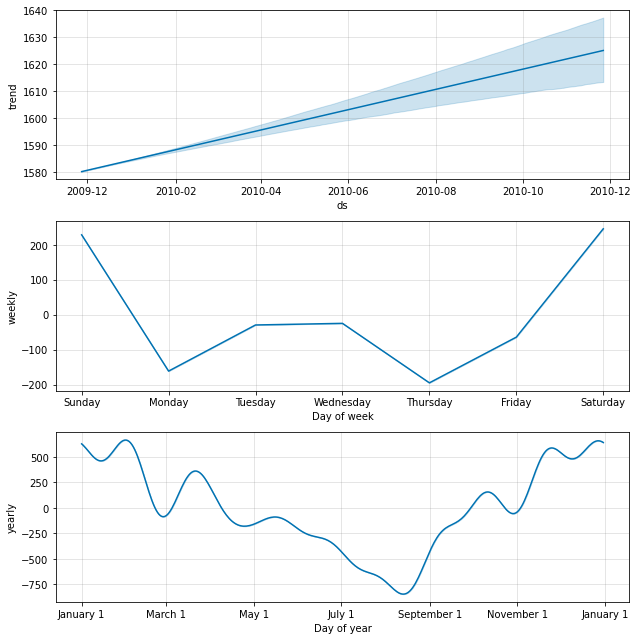

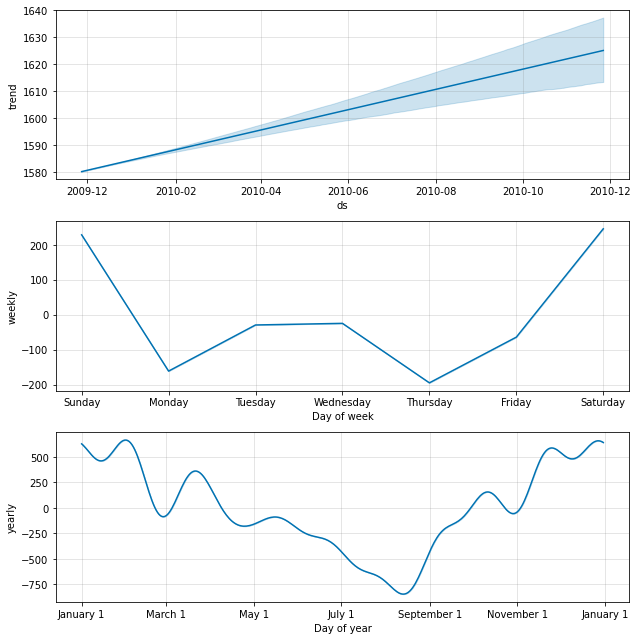

In [ ]:
model.plot_components(predictions)

In [ ]:
df_daily.reset_index(inplace=True)

In [ ]:

renamed_daily_df = df_daily.rename(columns= {"datetime": "ds", "Global_active_power": "y", "Global_reactive_power":"add1", "Voltage": "add2", "Global_intensity": "add3", "Sub_metering_1":"add4", "Sub_metering_2": "add5", "Sub_metering_3":"add6"})

In [ ]:
new_train = renamed_daily_df.iloc[:1077, :]
new_test = renamed_daily_df.iloc[1077:, :]

In [ ]:
model = Prophet()
model.add_regressor("add1")
model.add_regressor("add2")
model.add_regressor("add3")
model.add_regressor("add4")
model.add_regressor("add5")
model.add_regressor("add6")

In [ ]:
model = model.fit(new_train)
predictions = model.predict(new_test)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Question 17**

In [ ]:
MAPE = metric(new_test["y"], predictions["yhat"])
round(MAPE,2)

3.04

**Question 18**

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(df_test["y"], predictions["yhat"]))
rmse

44.87909204303396

**Question 19**

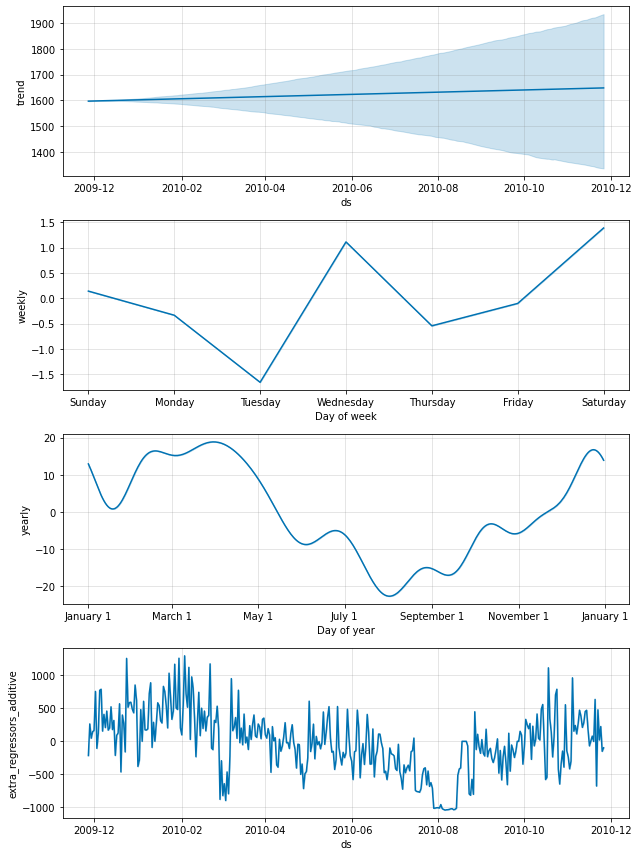

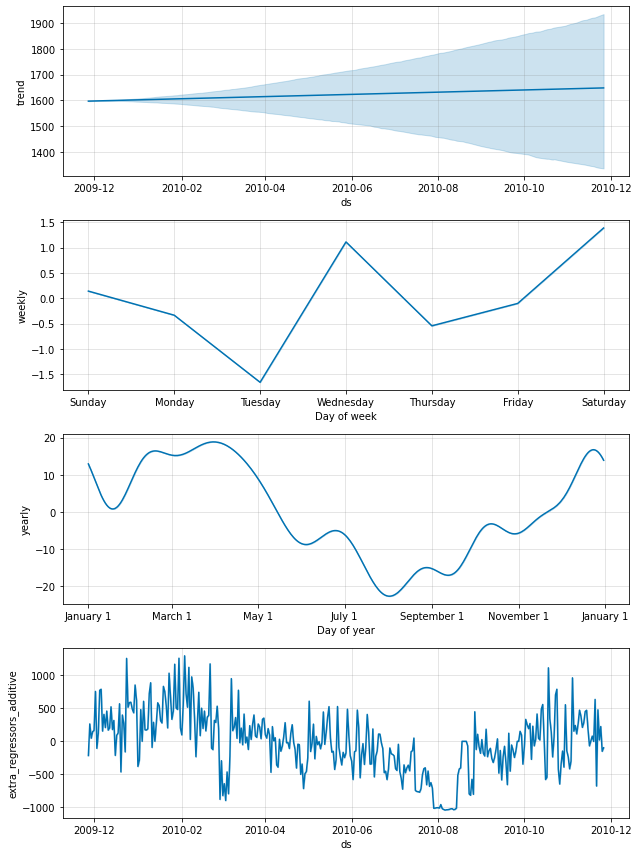

In [ ]:
model.plot_components(predictions)